In [90]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
import numpy
import scipy
import matplotlib
import matplotlib.dates as mpd
import pylab as plt
import datetime as dtm
import multiprocessing as mpp
import pickle
import os
import time
#
# TODO: phase out unreferenced hpc_lib calls...
import hpc_lib
#from hpc_lib import SACCT_data_handler
#from hpc_lib import *
#
import pandas
import pathlib

In [92]:
data_file_name='data/sacct_sherlock_out_serc2020_05_08.out'
#
output_path='data'
system_name='test'
h5_filename='{}.h5'.format(os.path.splitext(data_file_name)[0] )
n_cpu=6
pkl_name = "{}.pkl".format(os.path.splitext(data_file_name)[0])



print('*** data_File_name: {}'.format(data_file_name))
print('*** output path: {}'.format(output_path))
print('*** system_name: {}'.format(system_name))
print('*** h5_filename: {}'.format(h5_filename))




*** data_File_name: data/sacct_sherlock_out_serc2020_05_08.out
*** output path: data
*** system_name: test
*** h5_filename: data/sacct_sherlock_out_serc2020_05_08.h5


In [28]:
k0 = int(2e6)
chunk=int(1e5)
#
with open(data_file_name, 'r') as fin:
    xx = fin.readlines(k0)
    #xx = fin.read(250000)
    #xx = [fin.readline() for k in range(0,k0)]
#


print('** ', len(xx))

print('** ', type(xx))
print('** ', xx[0:2])
print('** ', xx[-2:])
print('** ', len(xx))

**  <class 'list'>
**  ['User|Group|GID|JobName|JobID|JobIDRaw|Partition|State|Timelimit|NCPUS|NNodes|Submit|Eligible|Start|End|Elapsed|SystemCPU|UserCPU|TotalCPU|NTasks|CPUTimeRAW|Suspended|\n', 'pjwomble|gorelick|26961|6d8f37762ad3d|54187830_67|54187984|serc|COMPLETED|00:30:00|1|1|2019-11-04T16:21:09|2019-11-04T16:21:12|2019-11-15T08:41:41|2019-11-15T08:44:31|00:02:50|00:02.604|01:16.033|01:18.637||170|00:00:00|\n']
**  ['|||batch|54797237_91.batch|54798110.batch||COMPLETED||1|1|2019-11-15T22:49:35|2019-11-15T22:49:35|2019-11-15T22:49:35|2019-11-15T22:52:04|00:02:29|00:03.544|02:11.412|02:14.956|1|149|00:00:00|\n', '|||extern|54797237_91.extern|54798110.extern||COMPLETED||1|1|2019-11-15T22:49:35|2019-11-15T22:49:35|2019-11-15T22:49:35|2019-11-15T22:52:06|00:02:31|00:00:00|00:00:00|00:00.001|1|151|00:00:00|\n']
**  1227


In [75]:
%%timeit

with open(data_file_name, 'r') as fin:
    xx = [fin.readline() for k in range(k0)]
#
print('** ', len(xx))

**  2000000
**  2000000
**  2000000
**  2000000
**  2000000
**  2000000
**  2000000
**  2000000
791 ms ± 15.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [76]:
%%timeit
#del xx
xx=[]

with open(data_file_name, 'r') as fin:
    while len(xx)<k0:
        xx += [*fin.readlines(chunk)]
    #
print('** ', len(xx))
#for cs in 2**(numpy.array(8))



**  2000256
**  2000256
**  2000256
**  2000256
**  2000256
**  2000256
**  2000256
**  2000256
617 ms ± 4.76 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [81]:
xx = []
with open(data_file_name, 'r') as fin:
    while len(xx)<k0:
        xx += fin.readlines(chunk)
for rw in xx[0:5]:
    print('** ', rw)
print('** ', len(xx))

**  User|Group|GID|JobName|JobID|JobIDRaw|Partition|State|Timelimit|NCPUS|NNodes|Submit|Eligible|Start|End|Elapsed|SystemCPU|UserCPU|TotalCPU|NTasks|CPUTimeRAW|Suspended|

**  pjwomble|gorelick|26961|6d8f37762ad3d|54187830_67|54187984|serc|COMPLETED|00:30:00|1|1|2019-11-04T16:21:09|2019-11-04T16:21:12|2019-11-15T08:41:41|2019-11-15T08:44:31|00:02:50|00:02.604|01:16.033|01:18.637||170|00:00:00|

**  |||batch|54187830_67.batch|54187984.batch||COMPLETED||1|1|2019-11-04T16:27:12|2019-11-04T16:27:12|2019-11-04T16:27:12|2019-11-15T08:44:31|10-16:17:19|00:02.603|01:16.033|01:18.636|1|922639|00:00:00|

**  |||extern|54187830_67.extern|54187984.extern||COMPLETED||1|1|2019-11-04T16:27:12|2019-11-04T16:27:12|2019-11-04T16:27:12|2019-11-15T08:44:31|10-16:17:19|00:00:00|00:00:00|00:00:00|1|922639|00:00:00|

**  ablanch|sklemp|16299|comLNY02|54527957|54527957|serc|COMPLETED|7-00:00:00|24|1|2019-11-11T15:46:04|2019-11-11T15:46:04|2019-11-12T06:54:21|2019-11-15T21:20:10|3-14:25:49|07:45:37|11-17:07:41

In [89]:
%%timeit 
with open(data_file_name, 'r') as fin:
    #xx = fin.readlines()

765 ms ± 33.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Scaling for readlines() batchs

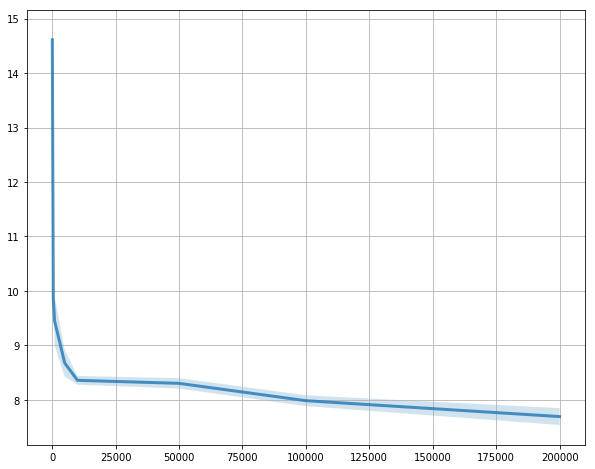

In [88]:
#
do_batch_scaling = 0
#
if do_batch_scaling:
    chunk_sizes = [100, 500, 1000, 5000, 10000, 50000, 100000, 200000, 500000, 1000000]
    times=[]
    nits=10
    loops=10
    aggs = numpy.zeros( (len(chunk_sizes),2) )
    for k,cs in enumerate(chunk_sizes):
        times=[]
        print('*** cs={}'.format(cs))
        for n in range(nits):
            t0 = time.time()
            for l in range(loops):
                xx=[]
                chunk=int(1e5)
                with open(data_file_name, 'r') as fin:
                    while len(xx)<k0:
                        xx += [*fin.readlines(cs)]
                    #
                #
            times += [time.time()-t0]
            #
        aggs[k] = [numpy.mean(times), numpy.std(times)]
    #
    print('** aggs: ')
    print('**\n', aggs)

    aggs = aggs[0:(len(chunk_sizes))]
    fg = plt.figure(figsize=(10,8))
    ax = plt.gca()
    ax.grid()
    #
    ax.plot(chunk_sizes, aggs[:,0], zorder=11, lw=3., alpha=.8)
    ax.fill_between(chunk_sizes, aggs[:,0]-aggs[:,1], aggs[:,0]+aggs[:,1], alpha=.2, zorder=1)

In [98]:
#with open(pkl_name, 'rb') as fin:
#    sacct_obj = pickle.load(fin)
#
sacct_obj = hpc_lib.SACCT_data_handler(data_file_name=data_file_name, max_rows=None, chunk_size=10000,
                                       verbose=1, n_cpu=6)

#sacct_obj_h5 = hpc_lib.SACCT_data_from_h5(h5in_file=h5_filename)

** load_sact_data(), max_rows=None
*** headers_rw:  User|Group|GID|JobName|JobID|JobIDRaw|Partition|State|Timelimit|NCPUS|NNodes|Submit|Eligible|Start|End|Elapsed|SystemCPU|UserCPU|TotalCPU|NTasks|CPUTimeRAW|Suspended|

*** load data:: headers:  ['User', 'Group', 'GID', 'JobName', 'JobID', 'JobIDRaw', 'Partition', 'State', 'Timelimit', 'NCPUS', 'NNodes', 'Submit', 'Eligible', 'Start', 'End', 'Elapsed', 'SystemCPU', 'UserCPU', 'TotalCPU', 'NTasks', 'CPUTimeRAW', 'Suspended', 'JobID_parent']
** load_sacct_data::len:  2677321
*** calc_jobs_summary: with prams: len(data)=2677321, verbose=1, n_cpu=6, step_size=100000
*** computing jobs_summary func on 6 cpu
** calc_summary:: ks: [      0  100002  200002  300000  400002  500002  600001  700002  800001
  900002 1000002 1100001 1200002 1300001 1400002 1500002 1600001 1700001
 1800002 1900001 2000000 2100001 2200001 2300002 2400000 2500000 2600001
 2677322]
*** computing jobs_summary func on 1 cpu
Starting jobs_summary...
*** computing jobs_sum

/Users/myoder96/Codes/HPC_analytics/hpc_lib.py:2224: RuntimeWarning: All-NaN slice encountered
  jobs_summary[['End', 'Start', 'NCPUS', 'NNodes']][k] = numpy.nanmax(sub_data['End']), numpy.nanmin(sub_data['Start']), numpy.max(sub_data['NCPUS']), numpy.max(sub_data['NNodes'])
/Users/myoder96/Codes/HPC_analytics/hpc_lib.py:2224: RuntimeWarning: All-NaN slice encountered
  jobs_summary[['End', 'Start', 'NCPUS', 'NNodes']][k] = numpy.nanmax(sub_data['End']), numpy.nanmin(sub_data['Start']), numpy.max(sub_data['NCPUS']), numpy.max(sub_data['NNodes'])
/Users/myoder96/Codes/HPC_analytics/hpc_lib.py:2224: RuntimeWarning: All-NaN slice encountered
  jobs_summary[['End', 'Start', 'NCPUS', 'NNodes']][k] = numpy.nanmax(sub_data['End']), numpy.nanmin(sub_data['Start']), numpy.max(sub_data['NCPUS']), numpy.max(sub_data['NNodes'])


** DEBUG: jobs_summary.shape = (33333,)
** DEBUG: jobs_summary.shape = (33334,)
** DEBUG: jobs_summary.shape = (33332,)
** DEBUG: jobs_summary.shape = (25767,)
** DEBUG: jobs_summary.shape = (33330,)
*** calc_jobs_summary: results [r.get() ] list set.
** DEBUG: shapes:: (892647,), (892647,)


/Users/myoder96/Codes/HPC_analytics/hpc_lib.py:2502: RuntimeWarning: invalid value encountered in greater
  ix_t = numpy.logical_and(t_start<=t.reshape(-1,1), t_end>t.reshape(-1,1))
/Users/myoder96/Codes/HPC_analytics/hpc_lib.py:2502: RuntimeWarning: invalid value encountered in greater
  ix_t = numpy.logical_and(t_start<=t.reshape(-1,1), t_end>t.reshape(-1,1))
/Users/myoder96/Codes/HPC_analytics/hpc_lib.py:2502: RuntimeWarning: invalid value encountered in greater
  ix_t = numpy.logical_and(t_start<=t.reshape(-1,1), t_end>t.reshape(-1,1))
/Users/myoder96/Codes/HPC_analytics/hpc_lib.py:2502: RuntimeWarning: invalid value encountered in greater
  ix_t = numpy.logical_and(t_start<=t.reshape(-1,1), t_end>t.reshape(-1,1))
/Users/myoder96/Codes/HPC_analytics/hpc_lib.py:2337: RuntimeWarning: invalid value encountered in greater
  ix_k = numpy.where(numpy.logical_and(t_start<=t, t_end>(t-bin_size) ))[0]
/Users/myoder96/Codes/HPC_analytics/hpc_lib.py:2337: RuntimeWarning: invalid value encount

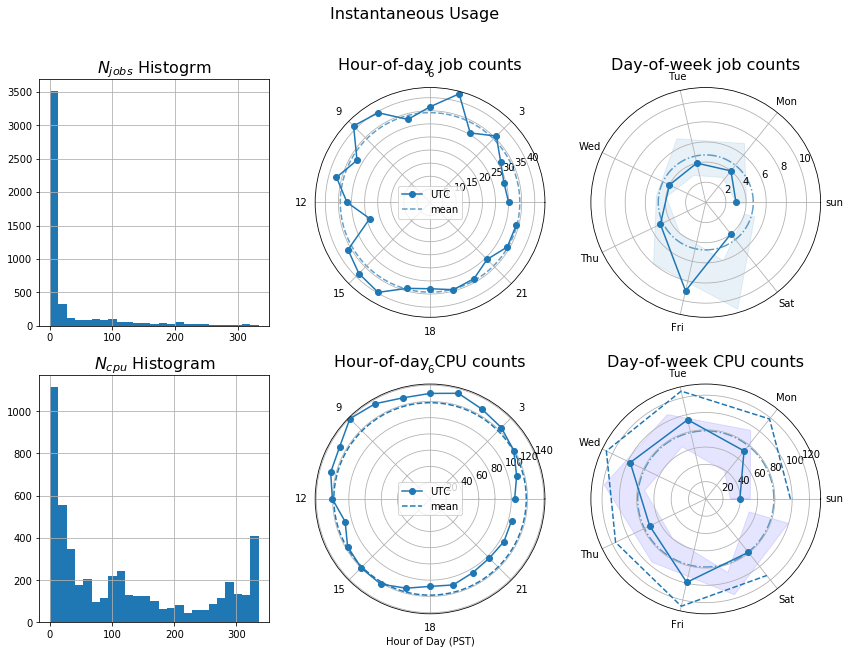

In [99]:
zz = sacct_obj.active_cpu_jobs_per_day_hour_report(periodic_projection='polar')


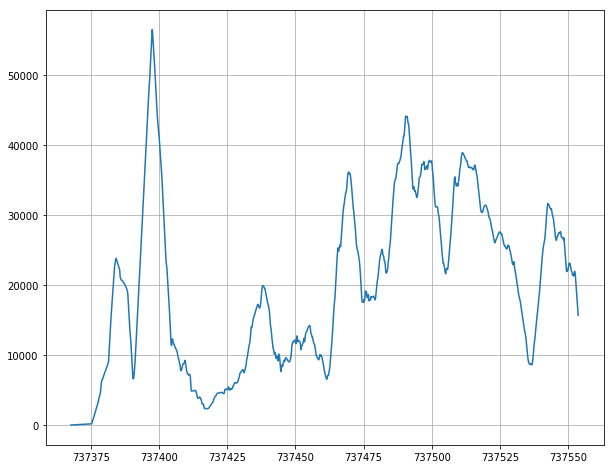

In [100]:
fg = plt.figure(figsize=(10,8))
ax1 = plt.gca()
ax1.grid()
#
ax1.plot(sacct_obj.weekly_hours['time'], sacct_obj.weekly_hours['cpu_hours'])

In [23]:
h5_return = sacct_obj.write_hdf5(h5out_file=h5_filename)

*** DEBUG: updating column [index], type=<i8
*** DEBUG: updating column [User], type=|S8
*** DEBUG: updating column [Group], type=|S8
*** DEBUG: updating column [GID], type=|S6
*** DEBUG: updating column [JobName], type=|S32
*** DEBUG: updating column [JobID], type=|S19
*** DEBUG: updating column [JobIDRaw], type=|S15
*** DEBUG: updating column [Partition], type=|S4
*** DEBUG: updating column [State], type=|S19
*** DEBUG: updating column [Timelimit], type=<f8
*** DEBUG: updating column [NCPUS], type=<i8
*** DEBUG: updating column [NNodes], type=<i8
*** DEBUG: updating column [Submit], type=<f8
*** DEBUG: updating column [Eligible], type=<f8
*** DEBUG: updating column [Start], type=<f8
*** DEBUG: updating column [End], type=<f8
*** DEBUG: updating column [Elapsed], type=<f8
*** DEBUG: updating column [SystemCPU], type=<f8
*** DEBUG: updating column [UserCPU], type=<f8
*** DEBUG: updating column [TotalCPU], type=<f8
*** DEBUG: updating column [NTasks], type=<f8
*** DEBUG: updating column

### Parallel benchmarks:

#### hpc_lib.calc_jobs_summary()

** ncpu: 1
** ncpu: 2
** ncpu: 3
** ncpu: 4
** ncpu: 5
** ncpu: 6
** ncpu: 7
** ncpu: 8


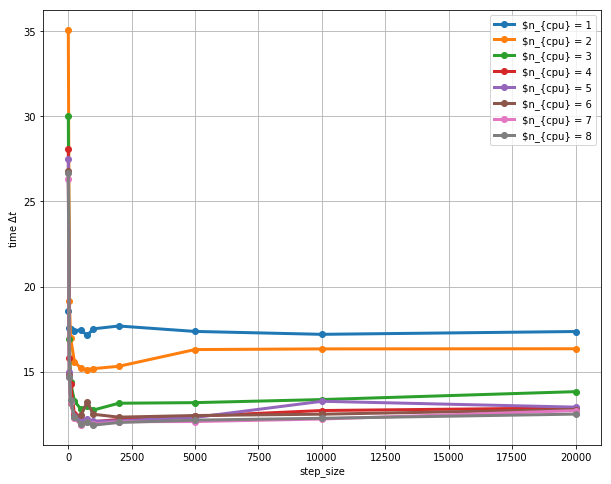

In [35]:

# t = time.time()
# myjs_4 = hpc_lib.calc_jobs_summary(data=sacct_obj.data, verbose=0, n_cpu=6, step_size=500)
# print('** time: {}'.format(time.time()-t))
#
Ns = [10, 50, 100, 250, 500, 750, 1000, 2000, 5000, 10000, 20000]
dts = numpy.zeros((8, len(Ns) ) )
#
for j,ncpu in enumerate(numpy.arange(1,9)):
    print('** ncpu: {}'.format(ncpu))
    for k,n in enumerate(Ns):
        t1 = time.time()
        myjs_4 = hpc_lib.calc_jobs_summary(data=sacct_obj.data, verbose=0, n_cpu=ncpu, step_size=n)
        #
        dts[j,k] = time.time() - t1
    #
#
#
plt.figure(figsize=(10,8))
ax1 = plt.gca()
ax1.grid()
ax1.set_xlabel('step_size')
ax1.set_ylabel('time $\Delta t$')
#
for k, (rw, n) in enumerate(zip(dts, numpy.arange(1,9))):
    ax1.plot(Ns, rw, ls='-', marker='o', lw=3, label='$n_{{cpu}} = {}$'.format(n))
    #
#
ax1.legend(loc=0)

## Parallel scaling performance:

### hpc_lib.active_jobs_cpu()

** time[2]: 2.034554958343506
** time[3]: 1.5374019145965576
** time[4]: 1.2325019836425781
** time[5]: 1.2570841312408447


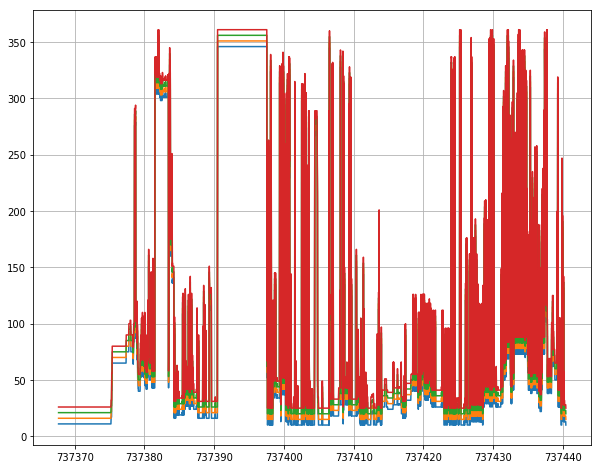

In [124]:
# some benchmarks on:
# hpc_lib.active_jobs_cpu()
#
fg = plt.figure(figsize=(10,8))
ax = plt.gca()
ax.grid()
#
for n in range(2,6):
    t0 = time.time()
    # zz = hpc_lib.calc_jobs_summary(data=sacct_obj.data, verbose=0, n_cpu=4, step_size=s_z)

    #zz = hpc_lib.get_cpu_hours(jobs_summary=sacct_obj.jobs_summary, n_cpu=n, step_size=1000)
    zz = hpc_lib.active_jobs_cpu(jobs_summary=sacct_obj.jobs_summary, n_cpu=n,
                                 mpp_chunksize=20000, verbose=0 )
    
    ax.plot(zz['time'], zz['N_cpu'] + n*5.)

    print('** time[{}]: {}'.format(n, time.time()-t0))

(-5, 20.0)

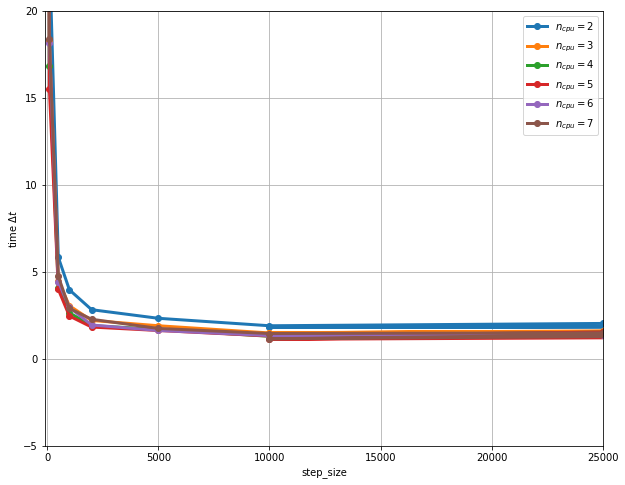

In [140]:
Ns = [10,  100, 500, 1000, 2000, 5000, 10000, 25000, 50000, 10000, 200000, 100000]
dts = numpy.zeros((6, len(Ns) ) )
#
t1 = time.time()
zz = hpc_lib.active_jobs_cpu(jobs_summary=sacct_obj.jobs_summary, n_cpu=1,
                                 mpp_chunksize=100000, verbose=0 )
print('*** SPP: ', time.time()-t1)
#
for j,n_cpu in enumerate(numpy.arange(2,8)):
    print('** ncpu: {}'.format(n_cpu))
    for k,n_chunk in enumerate(Ns):
        t1 = time.time()
        zz = hpc_lib.active_jobs_cpu(jobs_summary=sacct_obj.jobs_summary, n_cpu=n_cpu,
                                 mpp_chunksize=n_chunk, verbose=0 )
        #
        dts[j,k] = time.time() - t1
    #
#

#
plt.figure(figsize=(10,8))
ax1 = plt.gca()
ax1.grid()
ax1.set_xlabel('step_size')
ax1.set_ylabel('time $\Delta t$')
#
for k, (rw, n) in enumerate(zip(dts, numpy.arange(2,8))):
    ax1.plot(Ns, rw, ls='-', marker='o', lw=3, label='$n_{{cpu}} = {}$'.format(n))
    #
#
ax1.legend(loc=0)
ax1.set_yscale('linear')
ax1.set_xscale('linear')
ax1.set_xlim(-100, 25000)
ax1.set_ylim(-5, 20.)

### More active_jobs_cpu()

In [ ]:
#
Ns = [10, 100, 250, 500, 750, 1000, 2000, 5000]
dts_ajc = numpy.zeros((8, len(Ns) ) )
#
for j,ncpu in enumerate(numpy.arange(1,9)):
    print('** ncpu: {}'.format(ncpu))
    for k,n_chunk in enumerate(Ns):
        t1 = time.time()
        zz = hpc_lib.active_jobs_cpu(jobs_summary=sacct_obj.jobs_summary, n_cpu=ncpu,
                                     mpp_chunksize=n_chunk, verbose=0 )
        #
        dts_ajc[j,k] = time.time() - t1
    #
#

#
plt.figure(figsize=(10,8))
ax1 = plt.gca()
ax1.grid()
ax1.set_xlabel('step_size')
ax1.set_ylabel('time $\Delta t$')
#
for k, (rw, n) in enumerate(zip(dts_ajc, numpy.arange(1,9))):
    ax1.plot(Ns, rw, ls='-', marker='o', lw=3, label='$n_{{cpu}} = {}$'.format(n))
    #
#
ax1.legend(loc=0)

ax1.set_xlim(-50, 2500)
ax1.set_ylim(-10, 50)

### Scaling for hpc_lib.get_cpu_hours()


In [ ]:
Ns = [10,  100, 500, 1000, 2000, 5000, 10000, 25000, 50000, 100000, 200000]
dts = numpy.zeros((6, len(Ns) ) )
#
t1 = time.time()
zz = hpc_lib.get_cpu_hours(n_cpu=1, jobs_summary=sacct_obj.jobs_summary, step_size=1000)
print('*** SPP: ', time.time()-t1)
#
for j,n_cpu in enumerate(numpy.arange(2,8)):
    print('** ncpu: {}'.format(n_cpu))
    for k,n_chunk in enumerate(Ns):
        t1 = time.time()
        zz = hpc_lib.get_cpu_hours(n_cpu=n_cpu, jobs_summary=sacct_obj.jobs_summary, step_size=n_chunk)
        #
        dts[j,k] = time.time() - t1
    #
#

(-5, 30.0)

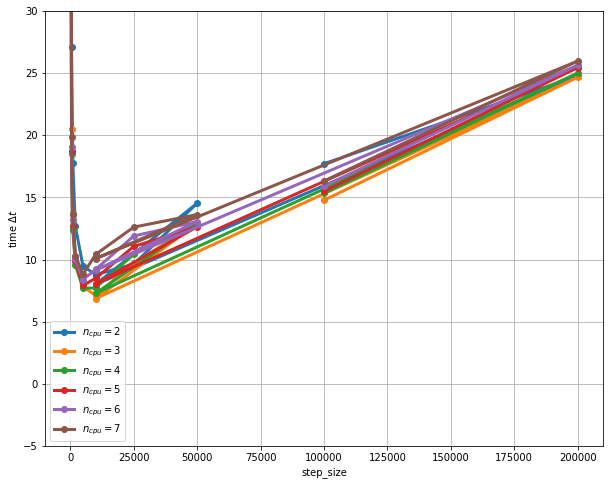

In [145]:
#
plt.figure(figsize=(10,8))
ax1 = plt.gca()
ax1.grid()
ax1.set_xlabel('step_size')
ax1.set_ylabel('time $\Delta t$')
#
for k, (rw, n) in enumerate(zip(dts, numpy.arange(2,8))):
    ax1.plot(Ns, rw, ls='-', marker='o', lw=3, label='$n_{{cpu}} = {}$'.format(n))
    #
#
ax1.legend(loc=0)
ax1.set_yscale('linear')
ax1.set_xscale('linear')
# ax1.set_xlim(-100, 25000)
ax1.set_ylim(-5, 30.)

In [55]:
weekly_hours = hpc_lib.get_cpu_hours(n_cpu=4, jobs_summary=sacct_obj.jobs_summary[0:100000])
weekly_hours_1 = hpc_lib.get_cpu_hours(n_cpu=1, jobs_summary=sacct_obj.jobs_summary[0:100000])

for k in numpy.random.randint(0,len(weekly_hours), size=50):
    print('** ', weekly_hours[k], weekly_hours_1[k])

Process ForkPoolWorker-957:
Process ForkPoolWorker-956:
Process ForkPoolWorker-955:
Process ForkPoolWorker-958:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/myoder96/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/myoder96/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/myoder96/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/myoder96/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/myoder96/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/myoder96/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File

KeyboardInterrupt: 

In [ ]:
# for k, (rw1, rw2) in enumerate(zip(weekly_hours, weekly_hours_1)):
#     print('***[{}]: {}, {} '.format(k, rw1, rw2))
fg = plt.figure(figsize=(10,8))
ax1 = plt.gca()
ax1.grid()
#
ax1.plot(weekly_hours['time'], weekly_hours['cpu_hours']/(24.*24.*7), ls='-')
#ax1.plot(weekly_hours_1['time'], weekly_hours_1['cpu_hours']+500., ls='-')

In [ ]:
k=20131
for c1, c2 in zip(myjs[k], myjs_4[k]):
    print('** [{}]: {}, {}'.format(c1==c2, c1, c2) )

In [ ]:
for rw in  (my_dta[0:200])[['JobID', 'JobID_parent']]:
    print('** ', rw)

for rw in sacct_obj.data:
    s = rw['JobID']
    if rw['JobID_parent'] != s[0:(s+'.').index('.')]:
        print('** got one! {}'.format(rw))

In [ ]:
my_dta = sacct_obj.data[:]

In [ ]:
my_dta.sort(axis=0, order=['JobID', 'Submit'], kind='quicksort')

In [ ]:
#ix_s = numpy.argsort(sacct_obj.data, order)

In [87]:
# how to assign to structured arrays:

import numpy as np

x = np.array([('Rex', 9, 81.0), ('Fido', 3, 27.0),
             ('Spot', 4, 42.), ('Buddy', 7, 67.)],
             dtype=[('name', 'U10'), ('age', 'i4'), ('weight', 'f4')])
#
y = np.array([('Carl', 10, 75.0), ('Joe', 7, 76.0), ('Bill', 21, 90.)],
             dtype=[('name2', 'U10'), ('age2', 'i4'), ('weight', 'f4')])

print(x[['name', 'age']])
print('***')
print(y[['name2', 'age2']])

[('Rex', 9) ('Fido', 3) ('Spot', 4) ('Buddy', 7)]
***
[('Carl', 10) ('Joe',  7) ('Bill', 21)]


In [97]:
my_ary = numpy.array([(11,72.), (8, 77.), (22, 91)], dtype=[('age', 'i4'), ('weight', 'f4')])
my_ary_ns = numpy.array([(11,72.), (8, 77.), (22, 91)])
#y[['age2', 'weight']] = my_ary[:][['age', 'weight']]

y['age2'], y['weight'] = my_ary_ns.T

y['age2'], y['weight'] += numpy.random.random( len(y)), numpy.random.random( len(y)) 

print('** ', y)

SyntaxError: illegal expression for augmented assignment (<ipython-input-97-7bfdadd42230>, line 7)

[0.10386094 0.37727016 0.90923086]


In [78]:
# multiple field indexing
print('** ', y)
y[['name2', 'age2']] = x[:-1][['name', 'age']]

#print(y[['name2', 'age2']])

# you can also use slicing if you want specific parts or the size does not match
#y[:1][['name2', 'age2']] = x[1:][['name', 'age']]

print('** ', y)

#print(y[:][['name2', 'age2']])

**  [('Carl', 10, 75.) ('Joe',  7, 76.) ('Bill', 21, 90.)]
**  [('Rex', 9, 75.) ('Fido', 3, 76.) ('Spot', 4, 90.)]


In [61]:
print('** ', x)
print('** ', y)

**  [('Rex', 9, 81.) ('Fido', 3, 27.)]
**  [('Fido', 3, 75.) ('Fido', 3, 76.)]
